# Approach 3: FGSM on Model 3

In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2

## FGSM model

We have applied the Fast Gradient Method on our model having an accuracy of 96% 

In [2]:
def preprocess(image):
    image = tf.image.decode_image(image_raw)
    image = tf.cast(image, tf.float32)/255
    image = tf.image.resize(image, (32, 32))
    image = tf.expand_dims(image , 0)
    return image

In [3]:
pretrained_model = tf.keras.models.load_model('./noLoss_model.h5')

In [4]:
path = "./82373-191501-bundle-archive/Test/00516.png"
image_raw = tf.io.read_file(path)
image = preprocess(image_raw)
image_probs = pretrained_model.predict(image)

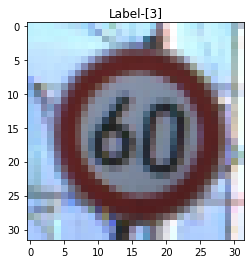

In [5]:
plt.figure()
plt.imshow(image[0]) # To change [-1, 1] to [0,1]
classes = pretrained_model.predict_classes(image)
plt.title("Label-"+str(classes))
plt.show()

This is the original image.

In [6]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = pretrained_model(input_image)
        loss = loss_object(input_label, prediction)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
#     print(gradient)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

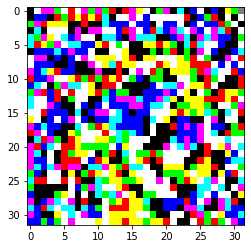

In [7]:
Original_image_index = 3
label = tf.one_hot(Original_image_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

This is the disturbance obtained from the gradient of the original image

In [8]:
def display_images(image, description):
    plt.figure()
    plt.imshow(image[0]*0.5+0.5)
    classes = pretrained_model.predict_classes(image)
    plt.title("Label-"+str(classes))
    plt.show()

For epsilon value: 0.00


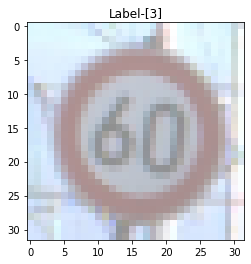

For epsilon value: 0.01


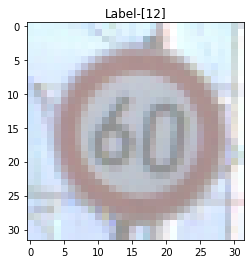

For epsilon value: 0.10


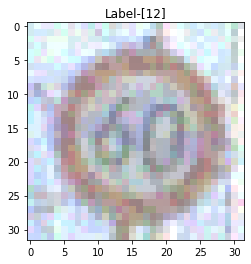

For epsilon value: 0.15


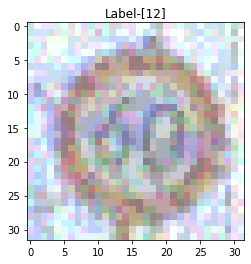

In [9]:
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
    adv_x = image + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, -1, 1)
    print("For epsilon value: %.2f" % eps)
    display_images(adv_x, descriptions[i])

These are the images obtained by applying different values of epsilon to the original image

In [10]:
path = "./82373-191501-bundle-archive/Test/00539.png"
image_raw = tf.io.read_file(path)
image = preprocess(image_raw)
image_probs = pretrained_model.predict(image)

In [11]:
classes = pretrained_model.predict_classes(image)
print(int(classes))
Original_image_index = int(classes)
label = tf.one_hot(Original_image_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))
perturbations = create_adversarial_pattern(image, label)

15


In [12]:
epsilon = 0.01
adv_x = image + epsilon*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)

Text(0.5, 1.0, 'Image after applying FGSM: [26]')

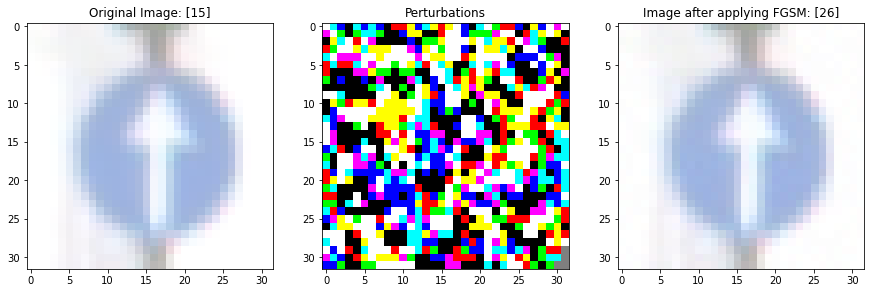

In [13]:
f, axarr = plt.subplots(1,3,figsize=(15,15))
axarr[0].imshow(image[0]*0.5+0.5)
axarr[0].set_title("Original Image: "+str(classes))
axarr[1].imshow(perturbations[0]*0.5+0.5)
axarr[1].set_title("Perturbations")
classes = pretrained_model.predict_classes(adv_x)
axarr[2].imshow(adv_x[0]*0.5+0.5)
axarr[2].set_title("Image after applying FGSM: "+str(classes))

Another example where it is clear that the image doesn't change much but is misclassified

In [14]:
from sklearn.metrics import accuracy_score
import random, os

In [15]:
def choose_folder():
    folder_label=["1","2","3","4","5","6","7",
                   "8","9","10","11","12","13","14",
                    "15","16","17","18","19","20","21",
                     "22","23","24","25","26","27","28",
                     "29","30","31","32","33","34","35",
                      "36","37","38","39","40","41","42"]
    
    folder=random.choice(folder_label)
    return folder


def image_path():
    folder=choose_folder()
    print("****************************************************************************")
    print("the True Label is",int(folder))
    path = r"./82373-191501-bundle-archive/Train/"
    path=path+folder+"/"
    #print("the path is ",path)
    my_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
    p=os.path.join(path, my_image)
    return p,folder

In [16]:
y_true=[]
y_pred=[]
for i in range(0,200,1):
    path,label=image_path()
    y_true.append(int(label))
    image_raw = tf.io.read_file(path)
    image = preprocess(image_raw)
    image_probs = pretrained_model.predict(image)
    classes = pretrained_model.predict_classes(image)
#     print(int(classes))
    
    Original_image_index = int(label)
    label = tf.one_hot(Original_image_index, image_probs.shape[-1])
    label = tf.reshape(label, (1, image_probs.shape[-1]))
    perturbations = create_adversarial_pattern(image, label)
    epsilon = 0.01
    adv_x = image + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, -1, 1)
    pred=int(pretrained_model.predict_classes(adv_x))
    y_pred.append(pred)
    print("The Predicted label is "+ str(pred))
       
    # getting the accuracy score
    


****************************************************************************
the True Label is 15
The Predicted label is 3
****************************************************************************
the True Label is 5
The Predicted label is 14
****************************************************************************
the True Label is 17
The Predicted label is 37
****************************************************************************
the True Label is 14
The Predicted label is 38
****************************************************************************
the True Label is 14
The Predicted label is 38
****************************************************************************
the True Label is 12
The Predicted label is 38
****************************************************************************
the True Label is 7
The Predicted label is 14
****************************************************************************
the True Label is 20
The Predicted label is 25
***********

The Predicted label is 40
****************************************************************************
the True Label is 7
The Predicted label is 25
****************************************************************************
the True Label is 40
The Predicted label is 14
****************************************************************************
the True Label is 31
The Predicted label is 13
****************************************************************************
the True Label is 40
The Predicted label is 14
****************************************************************************
the True Label is 3
The Predicted label is 12
****************************************************************************
the True Label is 18
The Predicted label is 20
****************************************************************************
the True Label is 34
The Predicted label is 14
****************************************************************************
the True Label is 5
The Predict

The Predicted label is 25
****************************************************************************
the True Label is 13
The Predicted label is 8
****************************************************************************
the True Label is 42
The Predicted label is 12
****************************************************************************
the True Label is 28
The Predicted label is 29
****************************************************************************
the True Label is 1
The Predicted label is 12
****************************************************************************
the True Label is 42
The Predicted label is 14
****************************************************************************
the True Label is 35
The Predicted label is 14
****************************************************************************
the True Label is 22
The Predicted label is 29
****************************************************************************
the True Label is 25
The Predic

In [20]:
correct_percent=accuracy_score(y_true, y_pred)
print("Accuracy: %.2f" % (correct_percent))

Accuracy: 0.02


We applied the method on 200 images and found that the accuracy comes down to 2.0% from 96% (for this run). Thus FGSM is the best method in all our approaches.